<a href="https://colab.research.google.com/github/urvihp1001/JPMorganQuant/blob/main/JPMC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import matplotlib.dates as mdates
from scipy.stats import norm
import datetime as dt

In [60]:
Loans_df=pd.read_csv('Loan_Data.csv')

In [61]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [62]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [63]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [64]:
Loans_df.tail(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
9990,4988839,3,5414.335510,13448.430230,81748.34618,6,559,0
9991,2243629,5,5181.244374,23957.565560,82865.37500,2,559,1
9992,2360357,1,2730.172218,4015.958697,50767.13518,6,569,0
9993,4668682,1,4337.978847,7277.852831,74551.25247,6,728,0
9994,4826911,1,2167.752325,4913.969275,51726.62423,6,672,0
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,0


## **Data Visualisations**

---


<br/>
FICO Score means credit score

Text(0.5, 1.0, 'FICO Score Histogram')

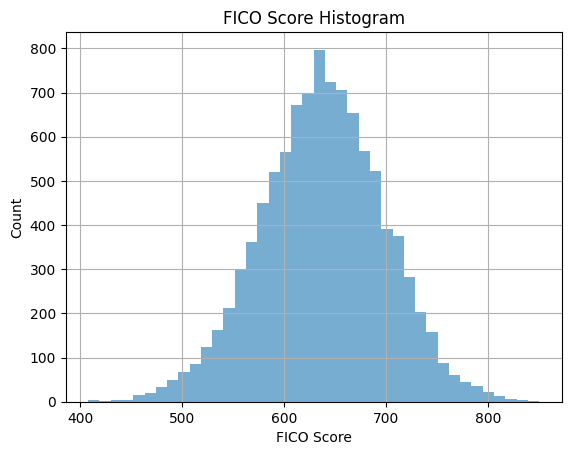

In [65]:
Loans_df['fico_score'].hist(bins=40,alpha=0.6,label='default=1')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
#bins = no. of discrete intervals in graph
#alpha= color intensity

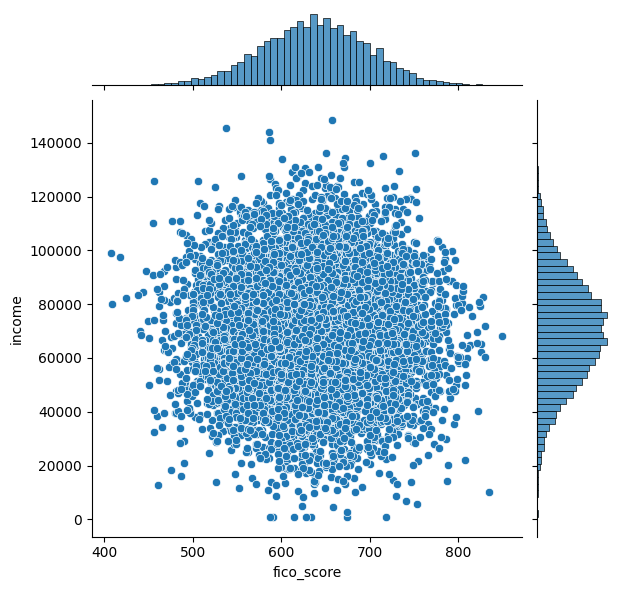

In [66]:
sns.jointplot(x='fico_score',y='income',data=Loans_df,kind='scatter')


#up- fico score distribution
#right- income distribution
#scatterplot to show correlation of fico and income
#weak correlation so circular spread

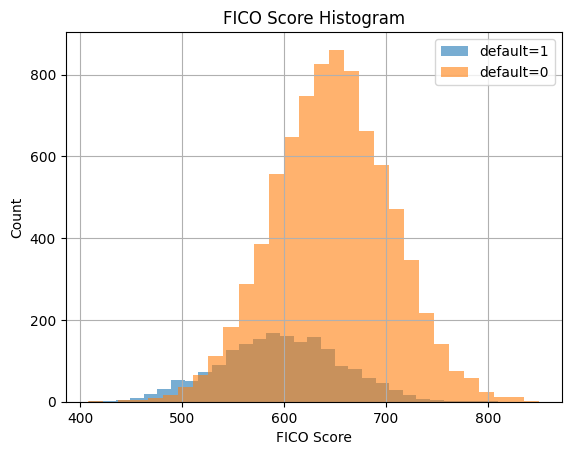

In [67]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()


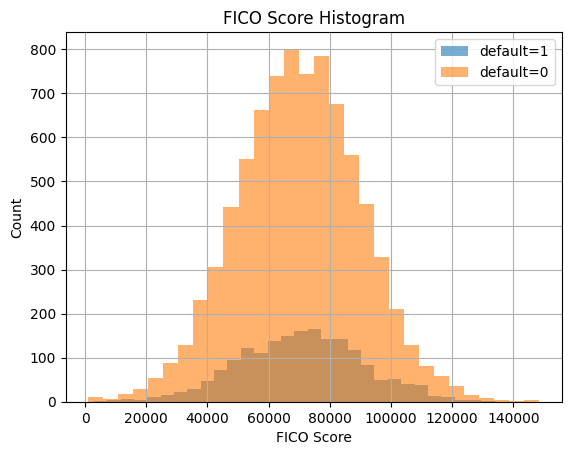

In [68]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

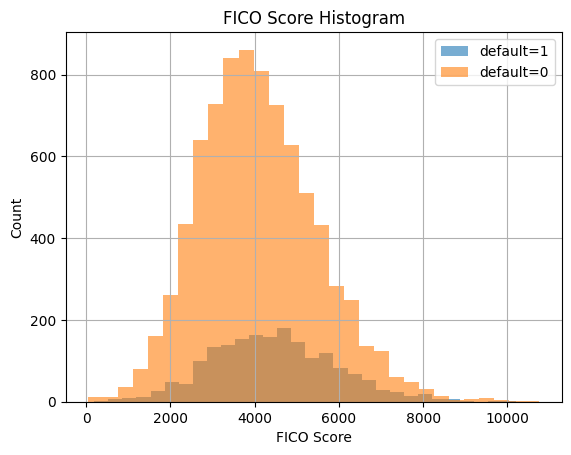

In [69]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

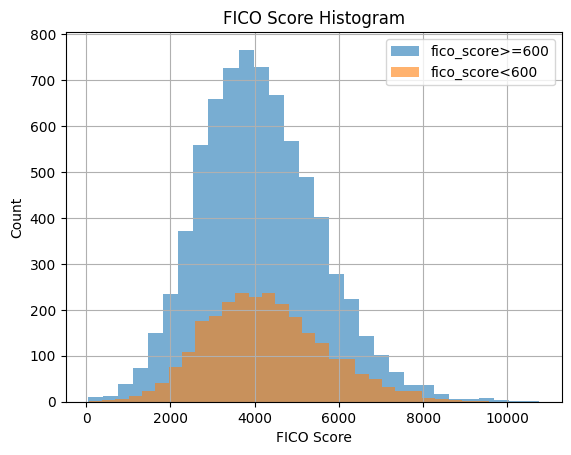

In [70]:
Loans_df[Loans_df['fico_score']>=600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

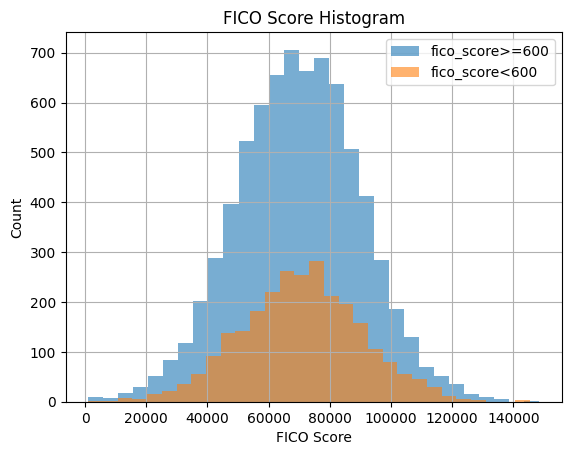

In [71]:
Loans_df[Loans_df['fico_score']>=600]['income'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['income'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

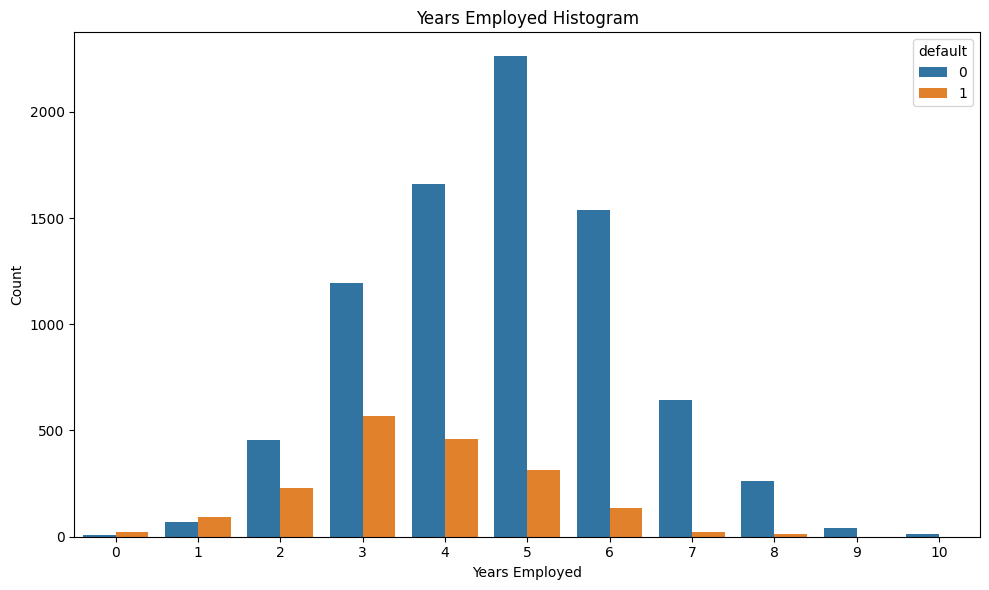

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x=Loans_df['years_employed'],data=Loans_df,hue='default')#comparing colors of default=0 or 1 as per no. of yrs employed
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.title('Years Employed Histogram')
plt.tight_layout()

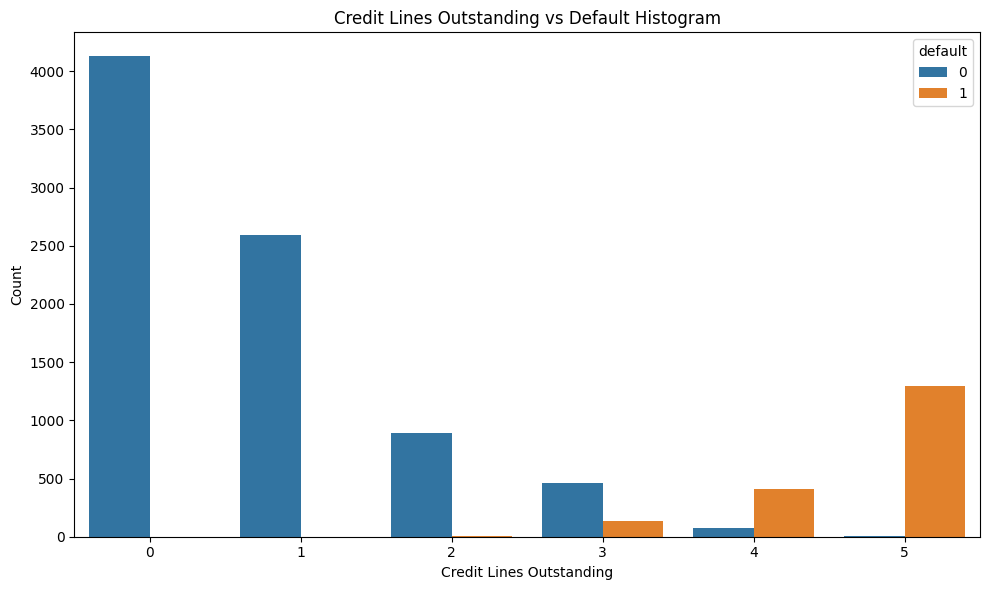

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x=Loans_df['credit_lines_outstanding'],data=Loans_df,hue='default')#comparing colors of default=0 or 1 as per no. of yrs employed
plt.xlabel('Credit Lines Outstanding')
plt.ylabel('Count')
plt.title('Credit Lines Outstanding vs Default Histogram')
plt.tight_layout()

In [74]:
Loans_df.groupby('credit_lines_outstanding')['default'].count().reset_index(name='count').sort_values(by='credit_lines_outstanding',ascending=True)

,credit_lines_outstanding,count
0,0,4128
1,1,2590
2,2,902
3,3,599
4,4,484
5,5,1297


In [75]:
Loans_df['ratio_income_Totdebt']=Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt']=Loans_df['income']/Loans_df['loan_amt_outstanding']

In [76]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,48.825030,15.485222


<Axes: >

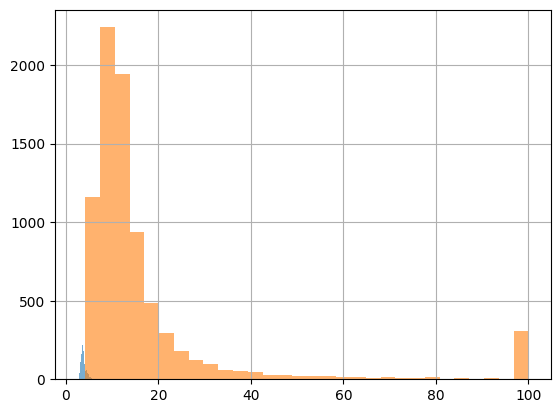

In [77]:
Loans_df[Loans_df['default']==1]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='default=1')


<Axes: >

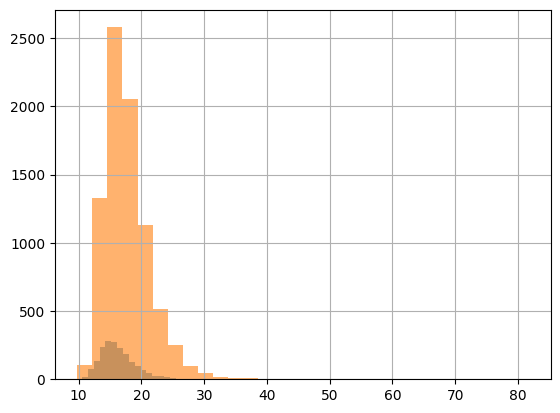

In [78]:
Loans_df[Loans_df['default']==1]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='default=1')


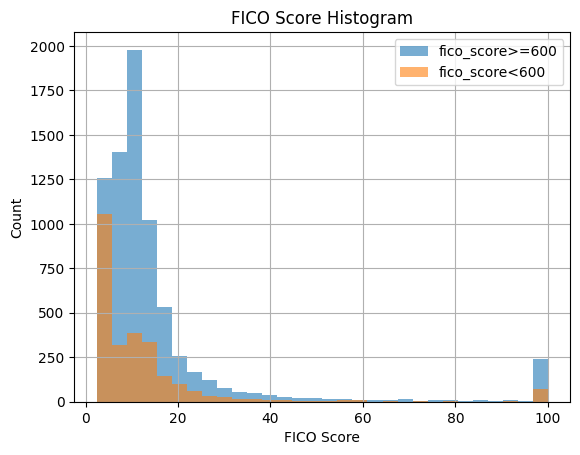

In [79]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_Totdebt'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

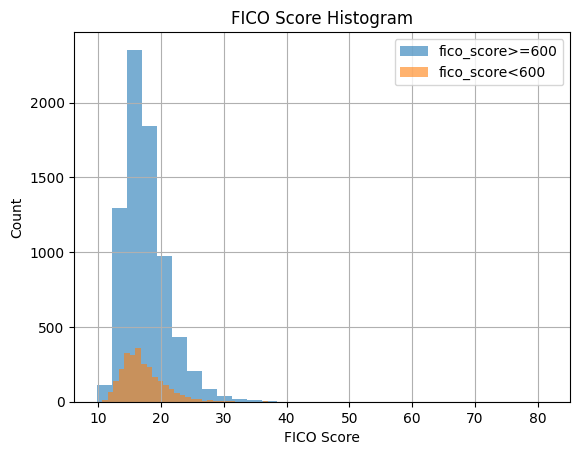

In [80]:
Loans_df[Loans_df['fico_score']>=600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['ratio_income_loan_amt'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

<Axes: xlabel='credit_lines_outstanding', ylabel='mean'>

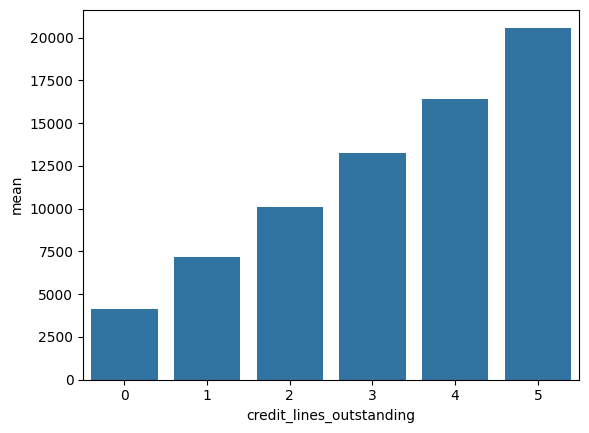

In [81]:
df=Loans_df.groupby('credit_lines_outstanding')['total_debt_outstanding'].mean().reset_index(name='mean').sort_values(by='credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean',data=df)

<Axes: xlabel='credit_lines_outstanding', ylabel='mean'>

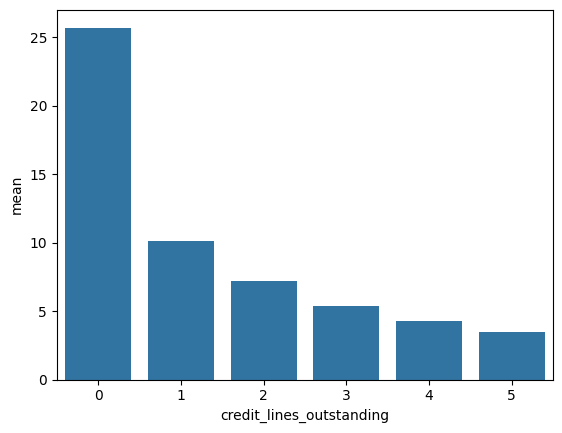

In [82]:
df=Loans_df.groupby('credit_lines_outstanding')['ratio_income_Totdebt'].mean().reset_index(name='mean').sort_values(by='credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean',data=df)

<Axes: xlabel='credit_lines_outstanding', ylabel='mean'>

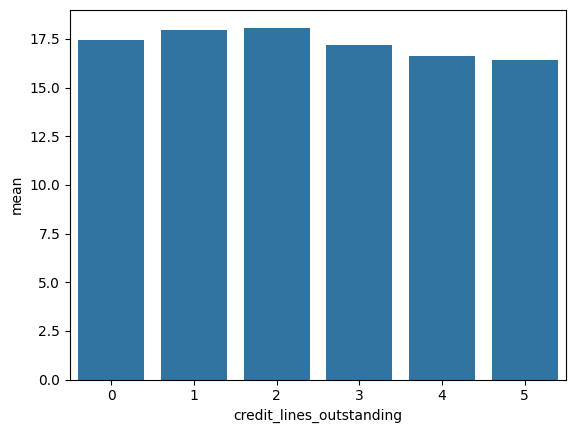

In [83]:
df=Loans_df.groupby('credit_lines_outstanding')['ratio_income_loan_amt'].mean().reset_index(name='mean').sort_values(by='credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean',data=df)

<Axes: xlabel='credit_lines_outstanding', ylabel='mean'>

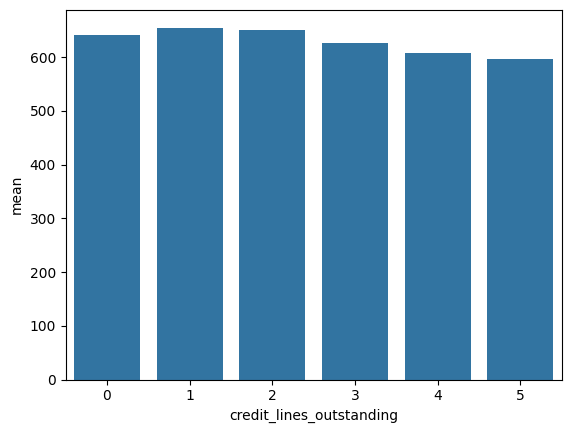

In [84]:
df=Loans_df.groupby('credit_lines_outstanding')['fico_score'].mean().reset_index(name='mean').sort_values(by='credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean',data=df)

Correlation in credit features

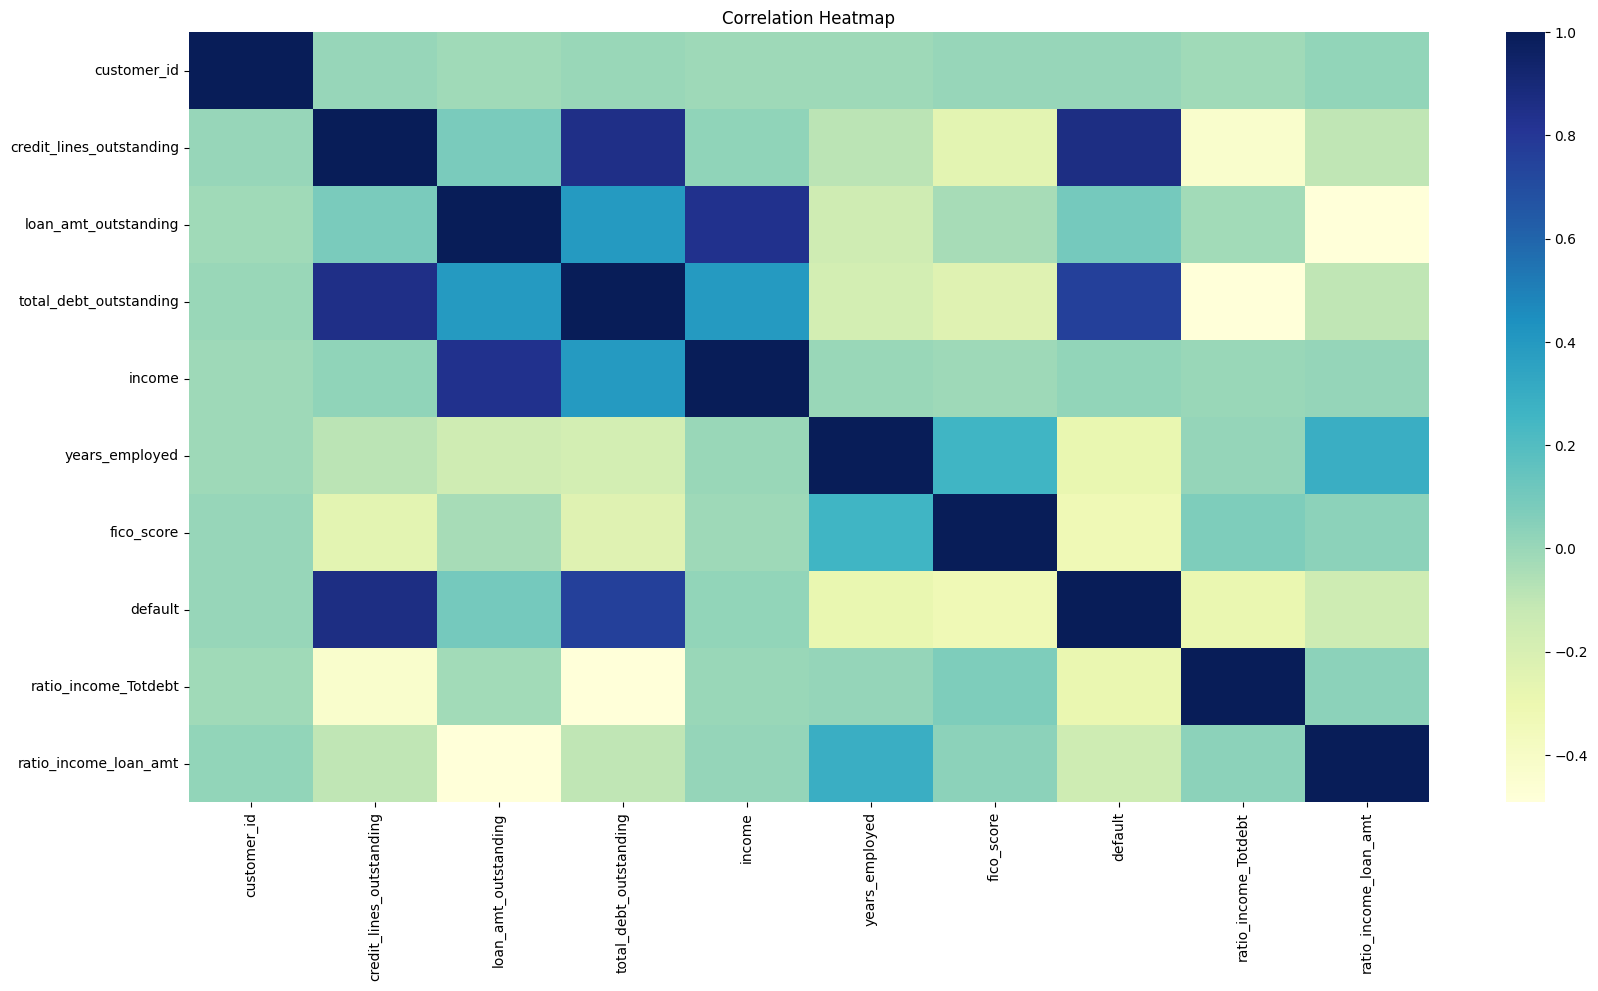

In [85]:
corr=Loans_df.corr()
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot_kws={'size':30},cmap='YlGnBu',ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [87]:
X=Loans_df.drop(['default'],axis=1)

In [88]:
Y=Loans_df['default']

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.6,random_state=101)


In [90]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

#lbfgs is an optimiser model
#ravel turns 2d into 1d if needed

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
lr_preds=clf_logistic.predict_proba(X_test)

In [92]:
lr_preds_df=pd.DataFrame(lr_preds[:,1][0:],columns=['lr_pred_PD'])
true_df=Y_test
#create dataframes of predictions and true labels

In [93]:
print(pd.concat([true_df.reset_index(drop=True),lr_preds_df],axis=1))

      default    lr_pred_PD
0           0  3.102782e-06
1           0  5.479062e-07
2           0  5.845643e-08
3           0  1.389427e-09
4           0  2.836795e-07
...       ...           ...
5995        0  3.452040e-04
5996        0  7.054933e-14
5997        0  3.242260e-08
5998        0  3.766931e-01
5999        0  3.753712e-07

[6000 rows x 2 columns]


In [94]:
import math

In [95]:
lr_preds_df.round(decimals=2).value_counts()

,count
lr_pred_PD,
0.00,4424
1.00,704
0.01,121
0.99,92
0.02,54
...,...
0.63,1
0.36,1
0.54,1


In [96]:
Y_test.value_counts()

,count
default,
0,4921
1,1079


In [97]:
# Reassign loan status based on the threshold and print the predictions
lr_preds_df['lr_pred_loan_status_60']=lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x>=0.6 else 0)
print("Non-default/default predictions at 60% threshold")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-default/default predictions at 60% threshold
lr_pred_loan_status_60
0    4957
1    1043
Name: count, dtype: int64


In [98]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,lr_preds_df['lr_pred_loan_status_60'])


array([[4882,   39],
       [  75, 1004]])

In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,lr_preds_df['lr_pred_loan_status_60']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4921
           1       0.96      0.93      0.95      1079

    accuracy                           0.98      6000
   macro avg       0.97      0.96      0.97      6000
weighted avg       0.98      0.98      0.98      6000



In [100]:
print(clf_logistic.score(X_test,Y_test))

0.9821666666666666


In [101]:
from sklearn.metrics import roc_curve

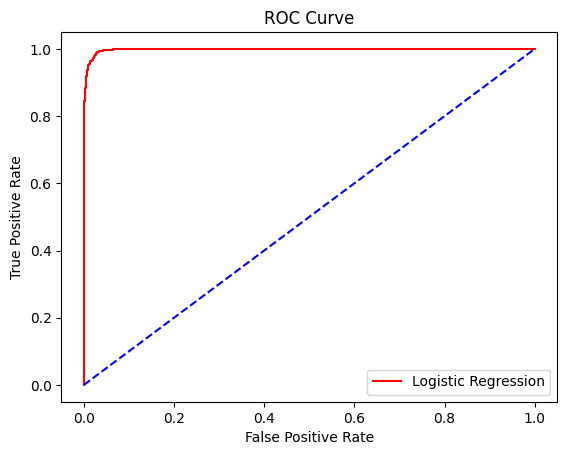

In [102]:
lr_prob_default=lr_preds[:,1]
fallout,sensitivity,thresholds=roc_curve(Y_test,lr_prob_default)
plt.plot(fallout,sensitivity,color='red',label='Logistic Regression')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate') #fall-out
plt.ylabel('True Positive Rate') #sensitivity
plt.title('ROC Curve')
plt.legend()
plt.show()

In [103]:
lr_preds_df.round(decimals=2)

,lr_pred_PD,lr_pred_loan_status_60
0,0.00,0
1,0.00,0
2,0.00,0
3,0.00,0
4,0.00,0
...,...,...
5995,0.00,0
5996,0.00,0
5997,0.00,0
5998,0.38,0


In [104]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,13.256433,17.422978


In [105]:
Loans_df.drop(['default'],axis=1,inplace=True)

In [106]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222


In [108]:
prob_to_default=clf_logistic.predict_proba(Loans_df)

In [109]:
prob_data=pd.DataFrame(prob_to_default[:,1][0:],columns=['prob_to_default'])

In [110]:
Loans_df=pd.concat([Loans_df,prob_data],axis=1)

In [111]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,prob_to_default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650,4.564102e-09
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576,9.837778e-01
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647,3.017112e-09
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407,1.104813e-09
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978,2.388204e-03
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,2.820059e-05
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,8.615093e-09
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,8.452764e-03
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,1.505395e-07


assuming a recovery rate of 10%, this can be used to give the expected loss on loan

In [115]:
recovery_rate=0.1

In [116]:
Loans_df['lgd']=(1-recovery_rate)*Loans_df['loan_amt_outstanding']

expected loss

In [118]:
Loans_df['expected_loss'] = Loans_df['prob_to_default'] * Loans_df['lgd']


In [119]:
Loans_df.tail()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,prob_to_default,lgd,expected_loss
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,2.820059e-05,2730.282393,0.076996
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,8.615093e-09,3731.615374,0.000032
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,8.452764e-03,2779.401354,23.493624
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,1.505395e-07,2960.011499,0.000446
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,10.035783,15.963074,1.742636e-03,1725.887232,3.007593


In [120]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,ratio_income_Totdebt,ratio_income_loan_amt,prob_to_default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.3896,2,649,3.218477,10.564398,1.000000e+00,9189.672021,9.189672e+03
2138,1998635,5,9563.693515,28825.601850,112120.6264,3,641,3.889620,11.723570,9.999977e-01,8607.324164,8.607304e+03
9203,4836461,5,9105.964213,42558.451490,133913.3823,3,601,3.146576,14.706118,1.000000e+00,8195.367792,8.195368e+03
9944,3983392,4,8989.178801,30103.662560,124197.6337,2,641,4.125665,13.816349,9.999492e-01,8090.260921,8.089850e+03
5460,2527305,5,8841.923630,32644.921580,115203.1519,2,541,3.528976,13.029196,1.000000e+00,7957.731267,7.957731e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
4176,5914019,0,6296.861054,2949.176186,127533.8161,4,586,43.243878,20.253554,1.916586e-17,5667.174949,1.086163e-13
9583,4997660,0,9648.078448,1310.915108,131091.5108,2,642,100.000000,13.587318,9.737891e-18,8683.270603,8.455675e-14
2584,3320662,0,4617.532273,1154.640148,115464.0148,4,669,100.000000,25.005567,1.432584e-17,4155.779046,5.953503e-14
5649,7874378,0,5579.071288,1236.455039,123645.5039,5,525,100.000000,22.162381,2.802400e-18,5021.164159,1.407131e-14


**Creating, Training, and Fitting a XGBoost Model to Oversampled Data**

In [121]:
import xgboost as xgb

In [123]:
Loans_df = pd.read_csv("Loan_Data.csv")


In [124]:
X=Loans_df.drop(['default'],axis=1)

In [125]:
Y=Loans_df['default']

In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.6,random_state=101)


In [127]:
model=xgb.XGBClassifier()
clf_xgbt=model.fit(X_train, np.ravel(Y_train))

In [128]:
xgbt_preds=clf_xgbt.predict_proba(X_test)

In [130]:
xgbt_preds_df=pd.DataFrame(xgbt_preds[:,1][0:],columns=['xgbt_pred_PD'])
true_df=Y_test

In [131]:
print(pd.concat([true_df.reset_index(drop=True),xgbt_preds_df],axis=1))

      default  xgbt_pred_PD
0           0      0.000010
1           0      0.000010
2           0      0.000032
3           0      0.000104
4           0      0.000007
...       ...           ...
5995        0      0.000025
5996        0      0.000019
5997        0      0.000002
5998        0      0.087854
5999        0      0.000738

[6000 rows x 2 columns]


In [133]:
xgbt_preds_df['xgbt_pred_loan_status_60']=xgbt_preds_df['xgbt_pred_PD'].apply(lambda x: 1 if x>=0.6 else 0)
print("Non-default/default predictions at 60% threshold")
print(xgbt_preds_df['xgbt_pred_loan_status_60'].value_counts())

#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,xgbt_preds_df['xgbt_pred_loan_status_60']))

#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,xgbt_preds_df['xgbt_pred_loan_status_60']))

Non-default/default predictions at 60% threshold
xgbt_pred_loan_status_60
0    4931
1    1069
Name: count, dtype: int64
[[4910   11]
 [  21 1058]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4921
           1       0.99      0.98      0.99      1079

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



0.9946666666666667


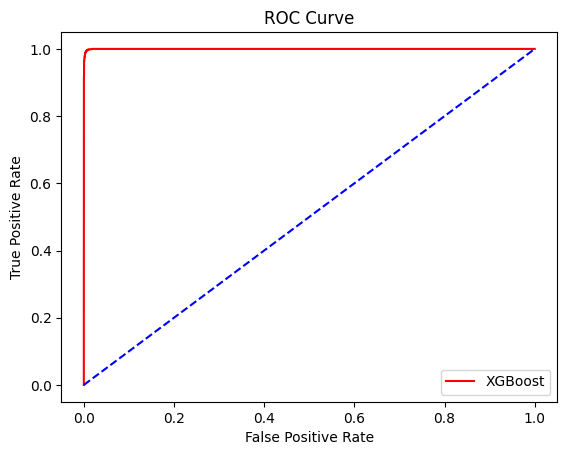

In [134]:
#accuracy
print(clf_xgbt.score(X_test,Y_test))
#ROC
from sklearn.metrics import roc_curve
xgbt_prob_default=xgbt_preds[:,1]
fallout,sensitivity,thresholds=roc_curve(Y_test,xgbt_prob_default)
plt.plot(fallout,sensitivity,color='red',label='XGBoost')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate') #fall-out
plt.ylabel('True Positive Rate') #sensitivity
plt.title('ROC Curve')
plt.legend()


In [136]:
xgbt_preds_df

,xgbt_pred_PD,xgbt_pred_loan_status_60
0,0.000010,0
1,0.000010,0
2,0.000032,0
3,0.000104,0
4,0.000007,0
...,...,...
5995,0.000025,0
5996,0.000019,0
5997,0.000002,0
5998,0.087854,0


In [137]:
Loans_df['default'].value_counts()

,count
default,
0,8149
1,1851


In [138]:
Loans_df.drop(['default'],axis=1,inplace=True)

In [139]:
prob_to_default=clf_xgbt.predict_proba(Loans_df)

In [140]:
prob_data=pd.DataFrame(prob_to_default[:,1][0:],columns=['prob_to_default'])

In [142]:
prob_data['prob_to_default'].apply(lambda x: 1 if x>=0.6 else 0).value_counts()

,count
prob_to_default,
0,8159
1,1841


In [143]:
Loans_df=pd.concat([Loans_df,prob_data],axis=1)

In [144]:
recovery_rate=0.1

In [145]:
Loans_df['lgd']=(1-recovery_rate)*Loans_df['loan_amt_outstanding']

expected loss

In [146]:
Loans_df['expected_loss'] = Loans_df['prob_to_default'] * Loans_df['lgd']


In [147]:
Loans_df.tail()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,prob_to_default,lgd,expected_loss
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0.000018,2730.282393,0.049646
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0.000003,3731.615374,0.012797
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0.000168,2779.401354,0.467509
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0.000105,2960.011499,0.309653
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,0.000027,1725.887232,0.045745


In [148]:
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,prob_to_default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,0.999512,9189.672021,9185.189258
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,0.999649,8607.324164,8604.302379
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,0.999642,8195.367792,8192.434946
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,0.998320,8090.260921,8076.671560
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,0.999761,7957.731267,7955.826881
...,...,...,...,...,...,...,...,...,...,...
7332,4901556,1,2833.868656,9089.344527,85814.07533,6,668,0.000002,2550.481790,0.004021
3527,3637841,0,2620.242601,4502.366728,75797.02600,7,642,0.000002,2358.218341,0.003669
7310,3980568,0,1763.383743,857.314606,85731.46063,7,667,0.000002,1587.045369,0.002753
4509,7237328,1,50.203718,103.133734,1000.00000,6,615,0.000048,45.183346,0.002175
